In [165]:
# John Choi
# CS 577
# Which Pitch is Most Effective?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import the data set given in site: https://www.kaggle.com/datasets/janus137/mlb-postseason-2024-pitch-by-pitch-data?resource=download
df = pd.read_csv("mlb_postseason_2024.csv")

# function to increment and categorize values from column 'description' per pitch
def log_outcome(row):
    description = row['description']
    if "strike" in description or "foul_tip" in description:
        if "swinging" in description:
            return "swing_miss"
        return "strike"
    elif "ball" in description:
        return "ball"
    elif "hit_into_play" in description:
        if "single" in row['des'] or "double" in row['des'] or "triple" in row['des'] or "homers" in row['des']:
            return "hit"
        else:
            return "out"
    else:
        return "hit_foul"

# map apply function to all rows
df['outcome_type'] = df.apply(log_outcome, axis=1)
# valid pitch types that should serve as catgeories
valid_pitch_types = ['FF', 'CH', 'SL', 'SI', 'FS', 'FC', 'KC', "CU", "ST"]
df = df[df['pitch_type'].isin(valid_pitch_types)]

grouped = df.groupby('pitch_type')

# calculate statistics and add to a data object enum
stats = grouped.apply(lambda x: pd.Series({
    'total_pitches': len(x),
    'whiffs': (x['outcome_type'] == 'swing_miss').sum(),
    'strikes': ((x['outcome_type'] == 'strike')|(x['outcome_type'] == 'swing_miss')).sum(),
    'hits': x['outcome_type'].isin(['hit', 'xb_hit']).sum(),
    'batting_avg': (x['outcome_type'] == 'hit').sum()/max((x['outcome_type'].isin(['strike', 'ball', 'hit', 'xb_hit', 'out', 'hit_foul'])).sum(), 1),
    'whiff_rate': (x['outcome_type'] == 'swing_miss').sum()/max((x['outcome_type'].isin(['strike', 'ball', 'hit', 'xb_hit', 'out', 'hit_foul'])).sum(), 1),
    'strike_rate': (x['outcome_type'] == 'strike').sum()/max((x['outcome_type'].isin(['strike', 'ball', 'hit', 'xb_hit', 'out', 'hit_foul'])).sum(), 1),
    'out_rate': (x['outcome_type'] == 'out').sum()/max((x['outcome_type'].isin(['strike', 'ball', 'hit', 'xb_hit', 'out', 'hit_foul'])).sum(), 1),
}))
# max is used to ensure nothing is divided by 0

# for display purposes
stats.reset_index(inplace=True)

print(stats)


  pitch_type  total_pitches  whiffs  strikes  hits  batting_avg  whiff_rate  \
0         CH          397.0    76.0    110.0  19.0     0.059190    0.236760   
1         CU          219.0    25.0     69.0  15.0     0.077320    0.128866   
2         FC          301.0    27.0     84.0  17.0     0.062044    0.098540   
3         FF         1094.0   124.0    307.0  57.0     0.058763    0.127835   
4         FS          100.0    24.0     27.0   2.0     0.026316    0.315789   
5         KC           64.0    14.0     27.0   2.0     0.040000    0.280000   
6         SI          712.0    42.0    187.0  59.0     0.088060    0.062687   
7         SL          553.0    88.0    169.0  23.0     0.049462    0.189247   
8         ST          279.0    51.0     89.0  10.0     0.043860    0.223684   

   strike_rate  out_rate  
0     0.105919  0.124611  
1     0.226804  0.108247  
2     0.208029  0.171533  
3     0.188660  0.122680  
4     0.039474  0.078947  
5     0.260000  0.120000  
6     0.216418  0.13

<ipython-input-165-33212352de8f>:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats = grouped.apply(lambda x: pd.Series({


<ipython-input-166-f64e8934adfb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stats, x= 'pitch_type', y= 'whiff_rate', palette= 'deep')


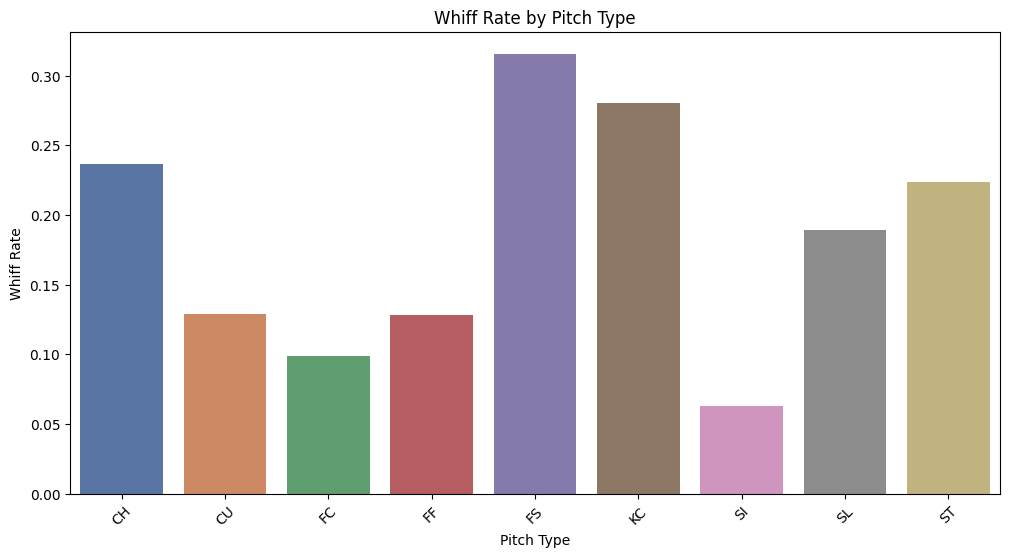

<ipython-input-166-f64e8934adfb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stats, x= 'pitch_type', y= 'strike_rate', palette= 'deep')


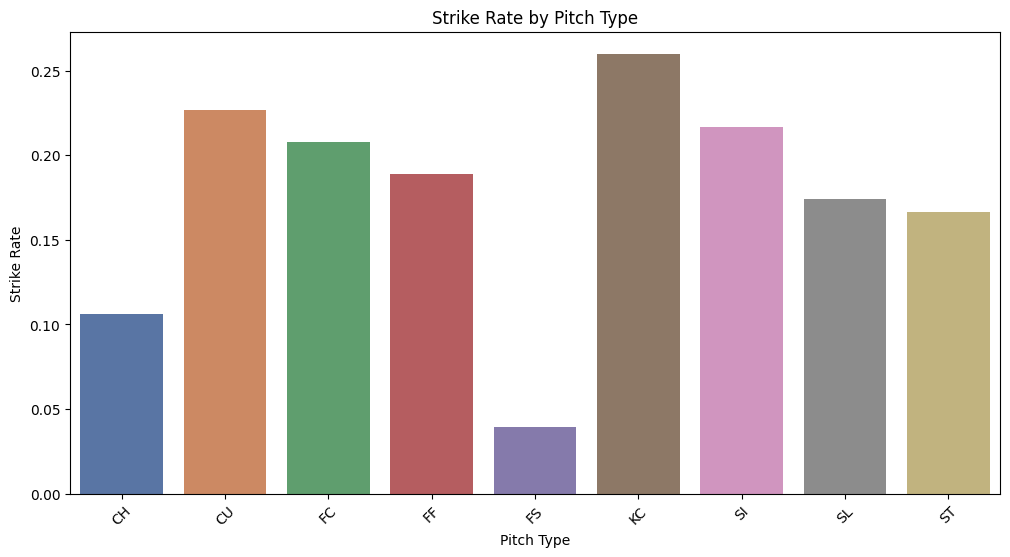

<ipython-input-166-f64e8934adfb>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stats, x= 'pitch_type', y= 'batting_avg', palette= 'deep')


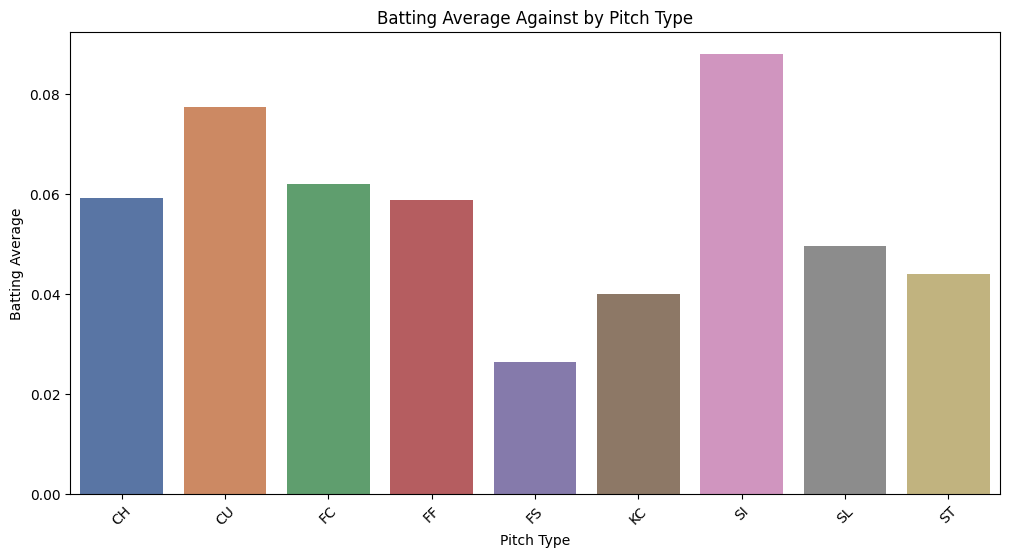

In [166]:
# Plot for whiff rate
plt.figure(figsize=(12, 6))
sns.barplot(data=stats, x= 'pitch_type', y= 'whiff_rate', palette= 'deep')
plt.title("Whiff Rate by Pitch Type")
plt.xlabel("Pitch Type")
plt.ylabel("Whiff Rate")
plt.xticks(rotation=45)
plt.show()

# Plot for strike rate
plt.figure(figsize=(12, 6))
sns.barplot(data=stats, x= 'pitch_type', y= 'strike_rate', palette= 'deep')
plt.title("Strike Rate by Pitch Type")
plt.ylabel("Strike Rate")
plt.xlabel("Pitch Type")
plt.xticks(rotation=45)
plt.show()

# Plot for batting average
plt.figure(figsize=(12, 6))
sns.barplot(data=stats, x= 'pitch_type', y= 'batting_avg', palette= 'deep')
plt.title("Batting Average Against by Pitch Type")
plt.ylabel("Batting Average")
plt.xlabel("Pitch Type")
plt.xticks(rotation=45)
plt.show()


In [167]:
# Frequency of each pitch
pitch_frequencies = stats['total_pitches']/stats['total_pitches'].sum()

# Run algorithm Grading Algorithm:Effectiveness = ((whiff rate * 1.5) + ((1-batting average) * 4) + strike rate + (out rate * 4) ) * pitch frequency * 0.7
stats['effectiveness'] = (
    (stats['whiff_rate'] * 1.5) +
    (1 - stats['batting_avg']) * 4 +
    (stats['strike_rate']) +
    (stats['out_rate'] * 4)
)
# Apply the frequency of pitch thrown to offset any outliers
stats['effectiveness_with_frequency'] = stats['effectiveness'] * (pitch_frequencies * 0.7)

# sort pitches in descending order of effectiveness grade

firstPitch = stats.sort_values(by= 'effectiveness_with_frequency', ascending=False).iloc[0]
secondPitch = stats.sort_values(by= 'effectiveness_with_frequency', ascending=False).iloc[1]
thirdPitch = stats.sort_values(by= 'effectiveness_with_frequency', ascending=False).iloc[2]

# Display the most effective pitch and its corresponding metrics
print("Most effective pitch: ")
print(firstPitch)
print("\nSecond most effective pitch:")
print(secondPitch)
print("\nThird most effective pitch:")
print(thirdPitch)

Most effective pitch: 
pitch_type                            FF
total_pitches                     1094.0
whiffs                             124.0
strikes                            307.0
hits                                57.0
batting_avg                     0.058763
whiff_rate                      0.127835
strike_rate                      0.18866
out_rate                         0.12268
effectiveness                   4.636082
effectiveness_with_frequency    0.954642
Name: 3, dtype: object

Second most effective pitch:
pitch_type                            SI
total_pitches                      712.0
whiffs                              42.0
strikes                            187.0
hits                                59.0
batting_avg                      0.08806
whiff_rate                      0.062687
strike_rate                     0.216418
out_rate                        0.138806
effectiveness                   4.513433
effectiveness_with_frequency    0.604866
Name: 6, dtype: object